In [1]:
import matplotlib.pyplot as plt
import lakeview as lv

In [2]:
import gzip

REFSEQ_GFF_PATH = (
    "/workspace/lakeview/tests/data/Refseq_GRCh37_genomic_annotation.gff.gz"
)

with gzip.open(REFSEQ_GFF_PATH, "rt") as f:
    gene_painter = lv.GeneAnnotation.from_file(
        file_object=f, format_="gff3", sequence_name="NC_000014.8"
    )


In [4]:
len(gene_painter.transcripts)

336

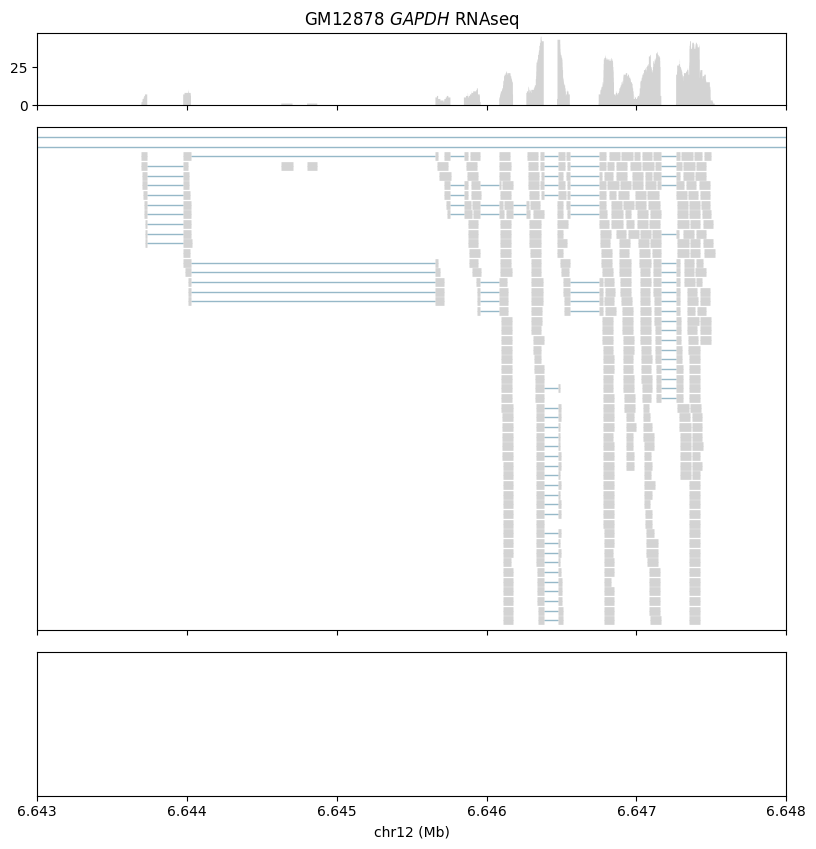

In [5]:
RNA_BAM_PATH = "/workspace/lakeview/tests/data/GM12878_RNAseq_GAPDH.sample=0.002.bam"

p = lv.SequenceAlignment.from_file(RNA_BAM_PATH, "rb")
gv = lv.GenomeViewer(3, figsize=(8, 8), height_ratios=(1, 7 ,2))
p.draw_pileup(gv.axes[0], show_mismatches=False)
p.draw_alignment(
    gv.axes[1],
    show_arrowheads=False,
    show_soft_clipping=False,
    show_mismatches=True,
    max_group_height=50,
    show_group_labels=False,
    show_group_separators=False,
)

gene_painter.draw_transcripts(gv.axes[2])

gv.set_xlim(6.643e6, 6.648e6)
gv.set_xlabel("chr12 (Mb)")
gv.axes[-1].xaxis.set_major_formatter(lv.util.base_formatter(unit="mb", fmt="{:.3f}"))
gv.set_title("GM12878 $\it{GAPDH}$ RNAseq")

In [5]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [2]:
RNASEQ_BAM_URL = "https://hgdownload-test.cse.ucsc.edu/goldenPath/hg19/encodeDCC/wgEncodeCshlLongRnaSeq/releaseLatest/wgEncodeCshlLongRnaSeqGm12878CellTotalAlnRep1.bam"
RNASEQ_BAI_URL = "https://hgdownload-test.cse.ucsc.edu/goldenPath/hg19/encodeDCC/wgEncodeCshlLongRnaSeq/releaseLatest/wgEncodeCshlLongRnaSeqGm12878CellTotalAlnRep1.bam.bai"
# Download with wget --no-check-certificate


RNASEQ_BAM_PATH = "GM12878_RNAseq_GAPDH.bam"
REGION = "chr12:6642596-6648525"

lv.helpers.download_bam(
    "/workspace/lakeview/docs/examples/NA12878_RNAseq/wgEncodeCshlLongRnaSeqGm12878CellTotalAlnRep1.bam",
    "/workspace/lakeview/docs/examples/NA12878_RNAseq/wgEncodeCshlLongRnaSeqGm12878CellTotalAlnRep1.bam.bai",
    REGION,
    RNASEQ_BAM_PATH,
)


In [3]:
p = lv.SequenceAlignment.from_file(
    "/workspace/lakeview/docs/examples/NA12878_RNAseq/GM12878_RNAseq_GAPDH.sample=0.002.bam",
    "rb",
)

[E::hts_open_format] Failed to open file "/workspace/lakeview/docs/examples/NA12878_RNAseq/GM12878_RNAseq_GAPDH.sample=0.002.bam" : No such file or directory


FileNotFoundError: [Errno 2] could not open alignment file `/workspace/lakeview/docs/examples/NA12878_RNAseq/GM12878_RNAseq_GAPDH.sample=0.002.bam`: No such file or directory

In [ ]:
len(p.segments)

503

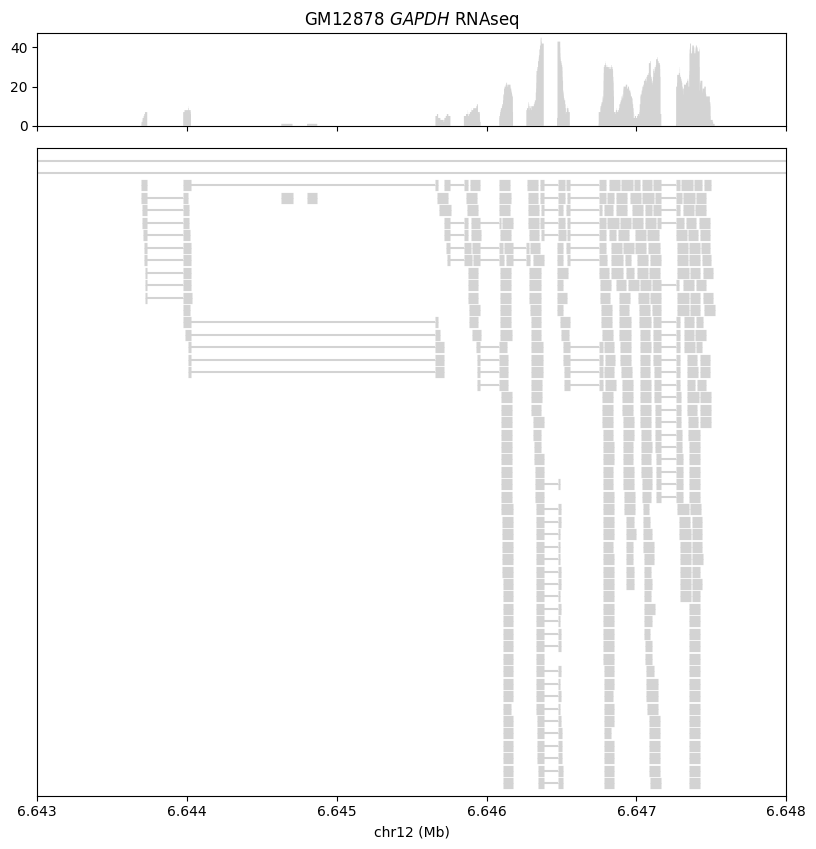

In [ ]:
gv = lv.GenomeViewer(2, figsize=(8, 8), height_ratios=(1, 7))
p.draw_pileup(gv.axes[0], show_mismatches=False)
p.draw_alignment(
    gv.axes[1],
    show_arrowheads=False,
    show_soft_clipping=False,
    show_mismatches=True,
    max_group_height=50,
    show_group_labels=False,
    show_group_separators=False,
)
gv.set_xlim(6.643e6, 6.648e6)
gv.set_xlabel("chr12 (Mb)")
gv.axes[-1].xaxis.set_major_formatter(lv.util.base_formatter(unit="mb", fmt="{:.3f}"))
gv.set_title("GM12878 $\it{GAPDH}$ RNAseq")
